# Session 3 - More image processing

In [1]:
import os

# addint python path
import sys
sys.path.append("..")
# openCV
import cv2
# numpy
import numpy as np
# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
# plotting
import matplotlib.pyplot as plt

In [2]:
filepath = os.path.join("..", "..","cds-vis-data","data","img","terasse.jpeg")

In [3]:
image = cv2.imread(filepath)

In [4]:
image.shape

(1576, 1200, 3)

# Greyscale histogram

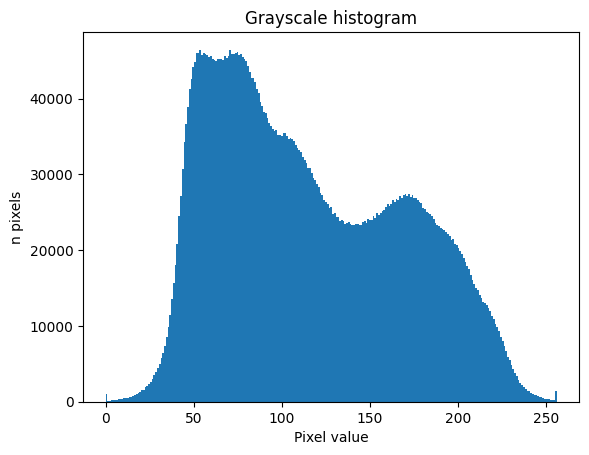

In [5]:
# converting to greyscale
grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# plotting, creating a canvas
plt.figure()

# add a histogram
plt.hist(image.flatten(), 255, [0,256])

# add title
plt.title("Grayscale histogram")
plt.xlabel("Pixel value")
plt.ylabel("n pixels")

# show the plot
plt.show()

Syntax: cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

Parameters:

images: list of images as numpy arrays. All images must be of the same dtype and same size.
channels: list of the channels used to calculate the histograms.
mask: optional mask (8 bit array) of the same size as the input image.
histSize: histogram sizes in each dimension
ranges: Array of the dims arrays of the histogram bin boundaries in each dimension
hist: Output histogram
accumulate: accumulation flag, enables to compute a single histogram from several sets of arrays.

In [6]:
hist_b = cv2.calcHist([image],[0], None, [255], [0,256])
hist_g = cv2.calcHist([image],[1], None, [255], [0,256])
hist_r = cv2.calcHist([image],[2], None, [255], [0,256])

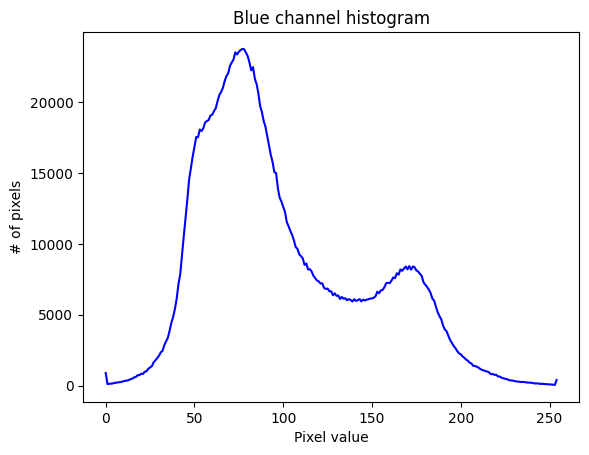

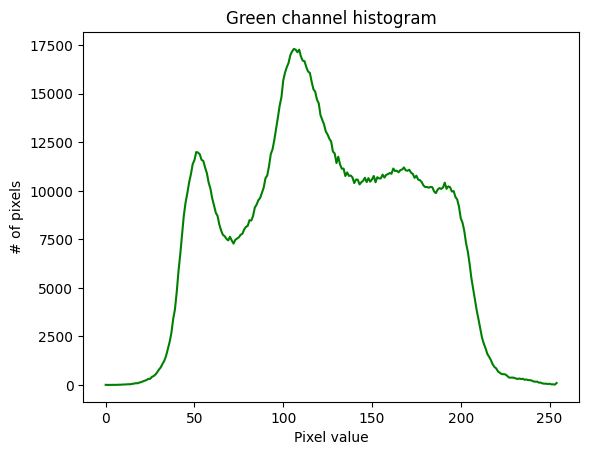

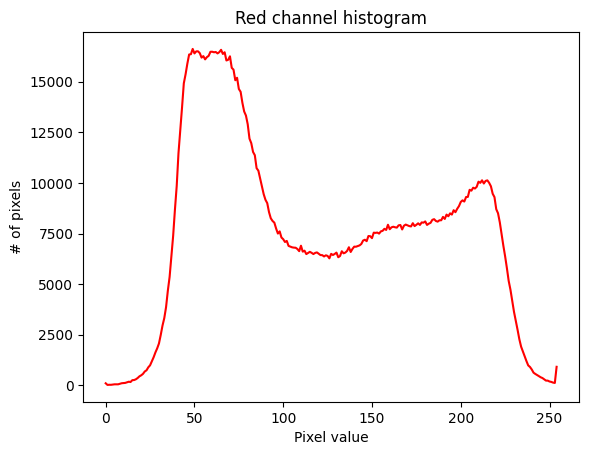

In [7]:
import matplotlib.pyplot as plt

# List of plots and their corresponding titles
plots = [(hist_b, "Blue channel histogram", "blue"),
         (hist_g, "Green channel histogram", "green"),
         (hist_r, "Red channel histogram", "red")]

# Loop through the plots
for data, title, color in plots:
    # Plotting, creating a canvas
    plt.figure()
    
    # Add the plot
    plt.plot(data, color=color)
    
    # Add title and labels
    plt.title(title)
    plt.xlabel("Pixel value")
    plt.ylabel("# of pixels")
    
    # Show the plot
    plt.show()


In [8]:
# a different way to do it in cv2, using cv2.split()
BLUE, GREEN, RED = cv2.split(image)

hist = cv2.calcHist([BLUE],[0], None, [255], [0,256])

<function matplotlib.pyplot.show(close=None, block=None)>

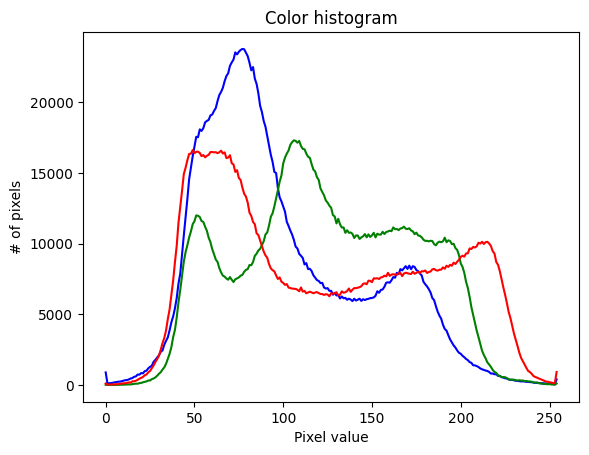

In [12]:
# create tuples
channels = cv2.split(image)

# colors
colors = ("blue", "green", "red")

# create plot
plt.figure()

# title 
plt.title("Color histogram")

# name on x and y axis
plt.xlabel("Pixel value")
plt.ylabel("# of pixels")
    
# initalize counter
i = 0 

for channel in channels:
    # histogram of values for single channel
    hist = cv2.calcHist([channel],[0], None, [255], [0,256])

    # get plot color
    line_color = colors[i]

    # plot histogram
    plt.plot(hist, color = line_color)

    # update counter
    i += 1

plt.show

# Comparing histograms

In [18]:
filepath_1 = os.path.join("..", "..","cds-vis-data","data","img","trex.png")
filepath_2 = os.path.join("..", "..","cds-vis-data","data","img","t-rex2.png")

In [19]:
image_1 = cv2.imread(filepath_1)
image_2 = cv2.imread(filepath_2)

In [20]:
hist_1 = cv2.calcHist([image_1],[0,1,2], None, [255,255,255],[0,256, 0,256, 0,256])
hist_2 = cv2.calcHist([image_2],[0,1,2], None, [255,255,255],[0,256, 0,256, 0,256])

In [22]:
# using minmax normalization

normalized_hist_1 = cv2.normalize(hist_1, hist_1, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_2 = cv2.normalize(hist_2, hist_2, 0, 1.0, cv2.NORM_MINMAX)

In [27]:
round(cv2.compareHist(normalized_hist_1, normalized_hist_2,cv2.HISTCMP_CHISQR),2)

33.76

# Exercise 1

In [ ]:
# specify the filepath
filepath = os.path.join("..", "..", "cds-vis-data", "data", "img")

In [175]:
def make_hist(fp):

    images = [os.path.join(fp, filename) for filename in os.listdir(fp)]

    for image in images:
        img_name = os.path.basename(image)
        print(img_name)
        imgs = cv2.imread(image)
        channels = cv2.split(imgs)
        
        # create plot
        plt.figure()


        # name on x and y axis
        plt.xlabel("Pixel value")
        plt.ylabel("# of pixels")

        for i, channel in enumerate(channels):
            hist = cv2.calcHist([channel],[0], None, [255], [0,256])
            colors = ("blue", "green", "red")

            # plotting histogram
            plt.plot(hist, color = colors[i])

            plt.title(f'Histogram - {img_name}')
            
        plt.show()       

trex.png


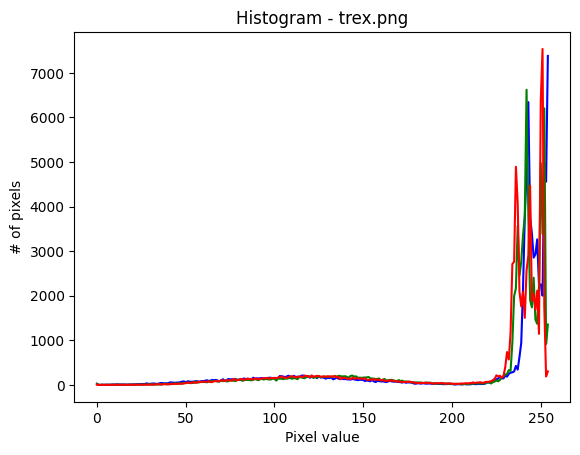

the_bedroom.jpg


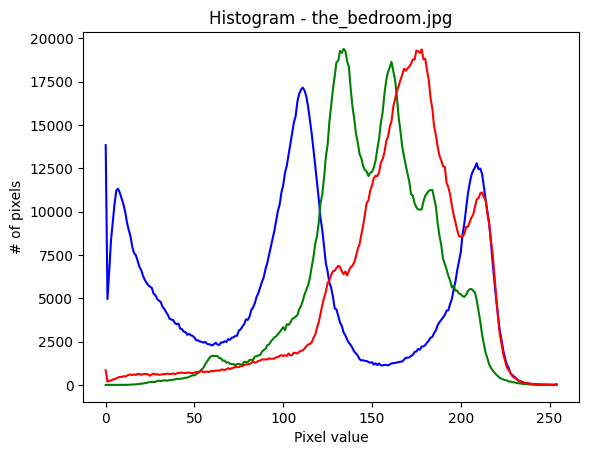

wave.png


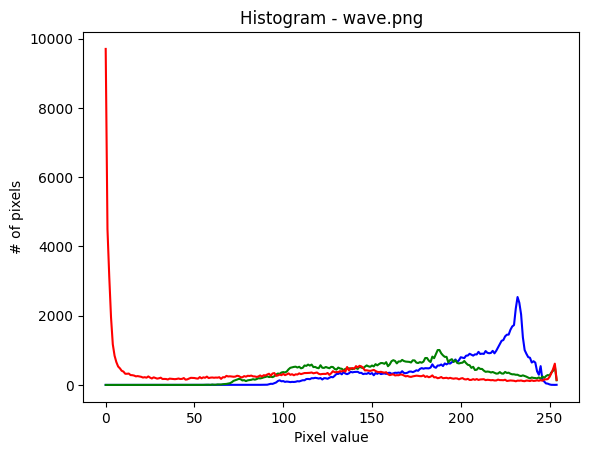

index.jpg


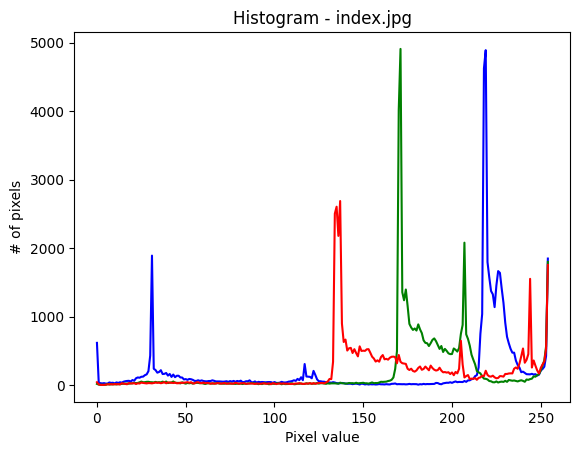

florence.jpg


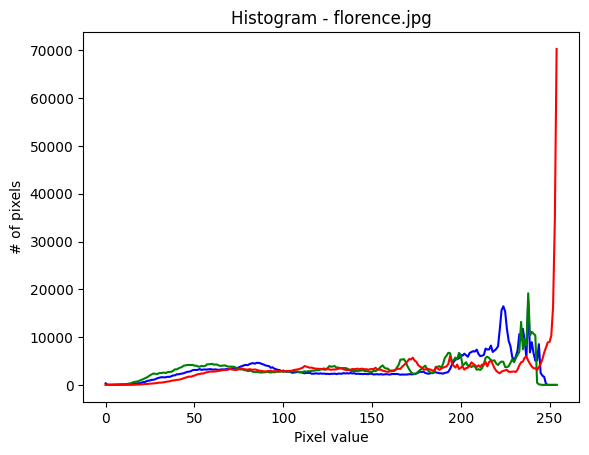

t-rex2.png


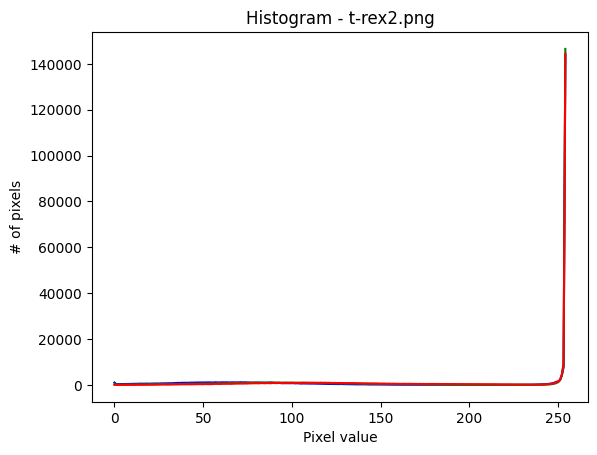

jefferson.jpg


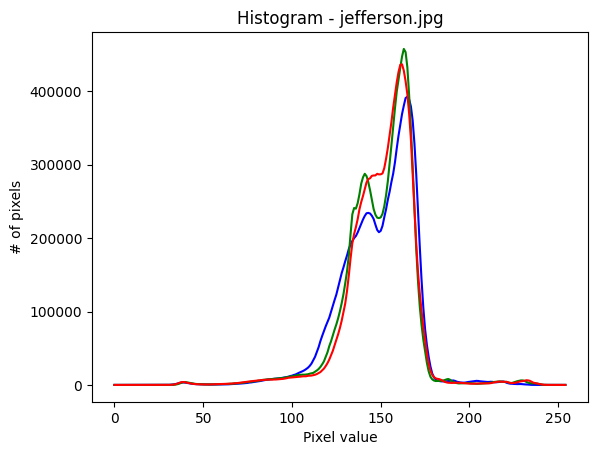

starry_night.jpg


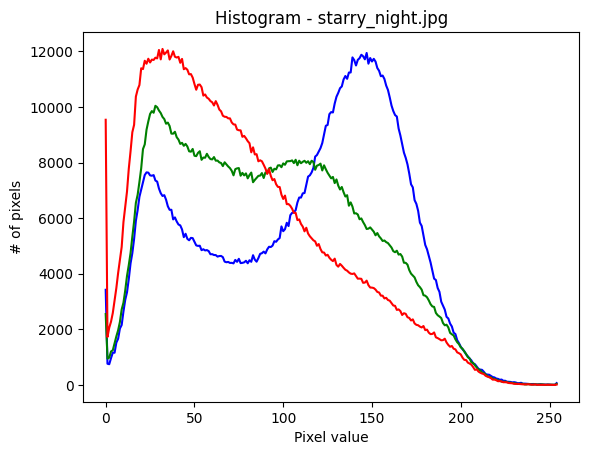

clonazepam_1mg.png


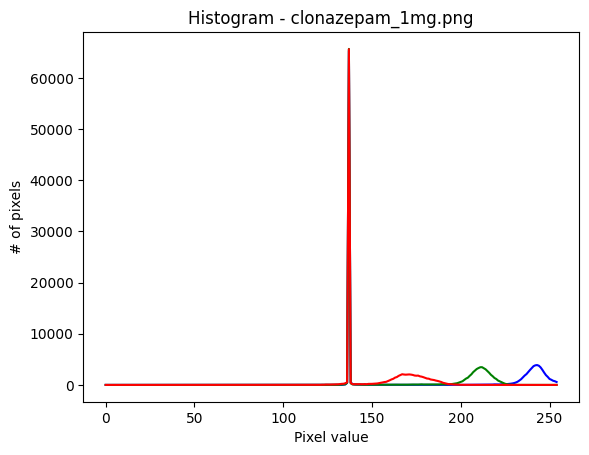

beach.png


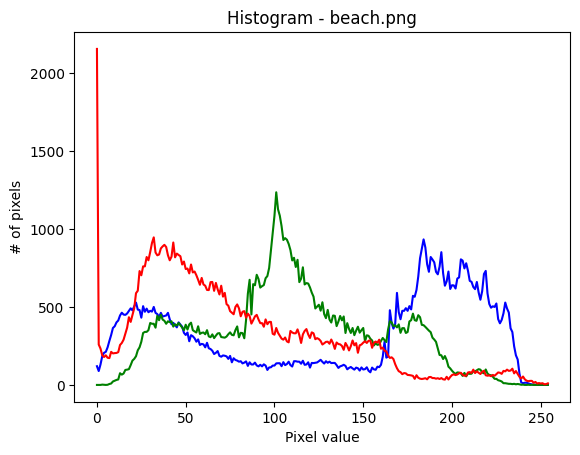

coins.png


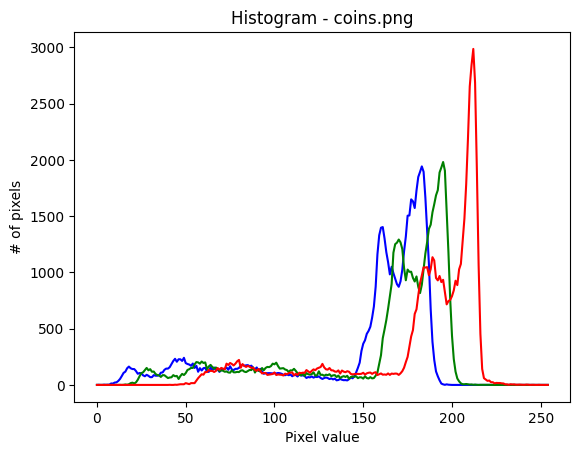

terasse.jpeg


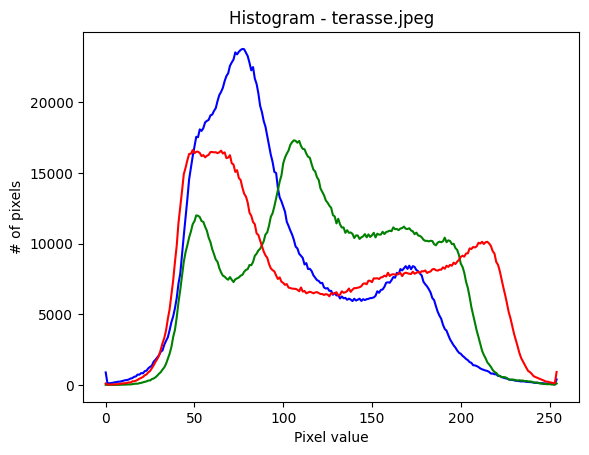

In [176]:
make_hist(filepath)